#Импортируем всякое разное (A)
(в этом разделе импортируем всякие библиотечки)

In [1]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

#Подгружаем данные (B)
(в этом разделе импортируем данные, немного корректируем исходную табличку и понимаем, с чем имеем дело)

In [2]:
df = pd.read_csv('/content/Drom_data.csv')
df.head()

,Unnamed: 0,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,...,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,2,950000,90.0,9200.0,1.6,2023,0,1,0,1,...,1,0,0,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,4,1165000,122.0,84594.0,1.8,2019,0,0,1,1,...,0,0,0,0,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,7,1145000,122.0,58195.0,1.8,2019,0,1,0,1,...,1,0,0,0,0,1,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [3]:
#в первом столбике стоят индексы ранней версии таблицы, сейчас индексация новая, поэтому дропнем его
#код нельзя перепрогонять, иначе столбцы будут удаляться и дальше
del df[df.columns[0]]
df.head()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,0,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,0,...,1,0,0,0,1,1,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,950000,90.0,9200.0,1.6,2023,0,1,0,1,0,...,1,0,0,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,1165000,122.0,84594.0,1.8,2019,0,0,1,1,0,...,0,0,0,0,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,1145000,122.0,58195.0,1.8,2019,0,1,0,1,0,...,1,0,0,0,0,1,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [4]:
#теперь давайте поймем, как выглядят признаки каждого объекта
df.loc[0].tolist()

[1350000,
 122.0,
 86684.0,
 1.8,
 2018,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 'https://auto.drom.ru/moscow/lada/vesta_cross/553824953.html',
 'Лада Веста Кросс']

Заметим, что это несколько количественных переменных (3 штуки и цена), год покупки автомобиля, ссылка на объявление, название автомобиля и много бинарных переменных

#Первичный анализ данных (C)
(в этом разделе уже внимательнее смотрим на данные и делаем предварительные преобразования для того, чтобы в дальнейшем можно было строить регрессии и всякое разное)

In [5]:
#сначала посмотрим, какие масштабы данных для понимания, с чем будем работать
df.describe()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,0_Модель не совпадает с ПТС,0_Мощность двигателя не совпадает с ПТС,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет
count,6.410000e+02,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,...,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,8.269794e+05,97.541342,106336.375975,1.613417,2016.531981,0.068643,0.825273,0.068643,0.934477,0.00624,...,0.012480,0.004680,0.942278,0.039002,0.224649,0.067083,0.716069,0.861154,0.193448,0.556942
std,3.958286e+05,12.755217,79313.194940,0.069424,6.061352,0.253043,0.380030,0.253043,0.247639,0.07881,...,0.111104,0.068305,0.233400,0.193750,0.417677,0.250361,0.451256,0.346055,0.395309,0.497135
min,6.000000e+04,59.000000,69.000000,1.200000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000e+05,87.000000,46749.000000,1.600000,2014.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.750000e+05,98.000000,89589.000000,1.600000,2018.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.115000e+06,106.000000,152000.000000,1.600000,2021.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,2.150000e+06,122.000000,400000.000000,1.800000,2024.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#теперь посмотрим, какие признаки есть у автомобилей
df.columns

Index(['Цена', 'Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Привод_передний', 'Привод_задний',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_лифтбек', 'Тип кузова_минивэн',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Цвет_бордовый', 'Цвет_голубой',
       'Цвет_желтый', 'Цвет_зеленый', 'Цвет_золотистый', 'Цвет_коричневый',
       'Цвет_красный', 'Цвет_оранжевый', 'Цвет_серебристый', 'Цвет_серый',
       'Цвет_синий', 'Цвет_фиолетовый', 'Цвет_черный', 'Цвет_белый',
       '0_Модель не совпадает с ПТС',
       '0_Мощность двигателя не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_3-6 записей о регистрации', '1_более 6 записей о регистрации',
       '2_Стоит на учете в ГИБДД', '3_Не был во владении у юр. лица',
       '4_Последний период владения до 1 года',
       '

Также следует отметить, что в процессе парсинга данных в каждой группе одна из дамми была "дропнута", чтобы избежать линейной связи между признаками, поэтому в дополнении к указанным колонкам есть еще следующий список: ***'0_Год не совпадает с ПТС', '1_1-2 записей о регистрации', '2_Не стоит на учете в ГИБДД', '3_Был во владении у юр. лица', '4_Последний период владения больше 6 лет', 'Коробка передач_АКПП', 'Привод_4WD', 'Тип кузова_джип/suv 3 дв.', 'Цвет_бежевый'.***

Данная особенность сбора данных не влияет на дальнейший анализ, потому что не меняет возможные принимаемые значения, однако ее следует принять к рассмотрению в процессе спецификации модели и размышлениях о релевантности переменных.

In [7]:
#изучим, можно ли сделать название машины используемым признаком или таких названий слишком много
df['Название машины'].nunique()

13

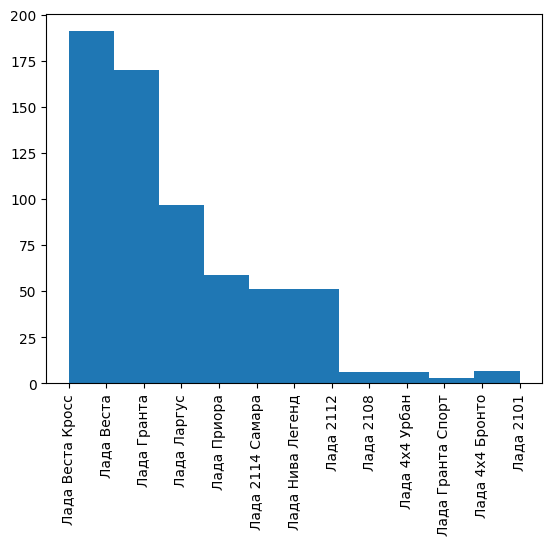

In [8]:
#судя по количеству наблюдений, да, потому что количество машин всего около 640, а "классов" всего 13, посмотрим на гистограмму распределения
plt.hist(df['Название машины'])
plt.xticks(rotation=90)
plt.show()
#для большей части названий наблюдений достаточно, однако для 5 наименований маловато, позже решим, что с этим делать

In [9]:
#дропнем ссылку как неинформативный для регрессии признак:
df_no_link = df.drop(['Ссылка'], axis=1)
df_link = df['Ссылка']
#разделение выборки на признаки и таргет будет позже, когда преобразуем столбик с названиями машин

#Создание базовой регрессии (D)
(в этом разделе создадим модель со всеми исходными (и даже чуть больше) признаками и посмотрим, есть ли в этом смысл)

In [10]:
#попробуем преобразовать название машин в бинарные признаки через onehotencoder, код частично взят из https://habr.com/ru/articles/666234/
enc = OneHotEncoder(sparse=False)

encoded_column = enc.fit_transform(df_no_link[['Название машины']])
one_hot_df = pd.DataFrame(encoded_column, columns=[f'Название машины_{i}' for i in range(len(df_no_link['Название машины'].unique()))])
df_enc = pd.concat([df_no_link.drop(['Название машины'], axis=1), one_hot_df], axis=1)

df_enc.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,Название машины_3,Название машины_4,Название машины_5,Название машины_6,Название машины_7,Название машины_8,Название машины_9,Название машины_10,Название машины_11,Название машины_12
0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,950000,90.0,9200.0,1.6,2023,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1165000,122.0,84594.0,1.8,2019,0,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1145000,122.0,58195.0,1.8,2019,0,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Заметим, что количество признаков увеличилось на 11, это получилось так: убрав название машин из признаков изначально получим 42 признака (df_no_link), прибавим 12 наименований (13-1 из-за того, что можно "отнормировать" к одному названию) и получим 54 (или +11) признака

In [11]:
#теперь у нас есть огромная таблица с кучей признаков. попробуем прогнать регрессию, что называется, в лоб,
#чтобы прикинуть на глаз, есть ли мультиколлинеарность или все и так хорошо
df_y = df_enc['Цена']
df_X = df_enc.drop(['Цена'], axis=1)

X = sm.add_constant(df_X)
model_0 = sm.OLS(df_y, X).fit()

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     138.2
Date:                Thu, 09 May 2024   Prob (F-statistic):          5.97e-290
Time:                        20:18:47   Log-Likelihood:                -8362.2
No. Observations:                 641   AIC:                         1.682e+04
Df Residuals:                     591   BIC:                         1.705e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Несмотря на то, что R^2 оказался довольно большим, мы видим, что многие коэффициенты оказались отрицательными, хотя по идее они должны вносить положительный вклад (например, объем двигателя). Более того, в категориальных группах (например, типов кузовов и названий машин) отрицательными являются все коэффициенты, а значит в таких группах никакой признак не является "предпочтительным", то есть вся группа вносит отрицательный вклад (это так не должно работать).

Получается, что так как многие коэффициенты очень большие по модулю и отрицательные, причем их отрицательность противоречит экономической интуиции, то, скорее всего, в данных присутствует мультиколлинеарность.

In [12]:
#проверим предположение о мультиколлинеарности, посчитав VIF-ы
#ниже мы увидим, что VIF -> inf, а значит будет присутствовать деление на ноль, чтобы избежать предупреждений поставим заглушку
warnings.filterwarnings("ignore")

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif["features"] = df_X.columns

vif = vif.round(1)
vif

,VIF,features
0,6.2,Мощность
1,2.4,Пробег
2,4.3,Объём двигателя
3,9.9,Год
4,3.7,Коробка передач_вариатор
5,5.1,Коробка передач_механика
6,3.3,Коробка передач_робот
7,inf,Привод_передний
8,inf,Привод_задний
9,1.3,Тип кузова_джип/suv 5 дв.


In [13]:
#посмотрим VIF-ы в виде массива
vif['VIF'].values

array([6.20000e+00, 2.40000e+00, 4.30000e+00, 9.90000e+00, 3.70000e+00,
       5.10000e+00, 3.30000e+00,         inf,         inf, 1.30000e+00,
               inf,         inf,         inf,         inf,         inf,
               inf, 1.90000e+00, 2.20000e+00, 1.30000e+00, 4.10000e+00,
       1.20000e+00, 5.20000e+00, 4.70000e+00, 3.00000e+00, 7.40000e+00,
       9.80000e+00, 4.90000e+00, 1.10000e+00, 1.07000e+01, 1.42000e+01,
       9.60000e+00, 4.20000e+00, 3.69000e+01, 2.65000e+01, 2.00000e+00,
       1.90000e+00, 1.10000e+00, 1.40000e+00, 1.70000e+00, 1.80000e+00,
               inf,         inf,         inf,         inf, 5.11050e+03,
       1.02089e+04,         inf,         inf,         inf,         inf,
               inf, 4.94684e+04,         inf])

Заметим, что много VIF-ов стремятся к бесконечности, особенно это касается названия машин и типов кузовов. В принципе, это было понятно еще из таблички с результатами оценивания регрессии, потому что именно эти группы имели самые подозрительные коэффициенты. Также присутствует много больших VIF-ов, с ними тоже что-то надо делать.

In [14]:
#проверим, сколько VIF-ов стремятся к бесконечности и по каким признакам:
vif[vif['VIF']==np.inf]

,VIF,features
7,inf,Привод_передний
8,inf,Привод_задний
10,inf,Тип кузова_лифтбек
11,inf,Тип кузова_минивэн
12,inf,Тип кузова_седан
13,inf,Тип кузова_универсал
14,inf,Тип кузова_хэтчбек 3 дв.
15,inf,Тип кузова_хэтчбек 5 дв.
40,inf,Название машины_0
41,inf,Название машины_1


Получилось, что в данных и правда присутствует мультиколлинеарность, значит базовая регрессия со всеми признаками едва ли хорошая идея. Попробуем что-то придумать!

Самое логичное - отредактировать признаки так, чтобы снизить мультиколлинеарность и сделать их более агрегированными, общими. Приглашаем в следующий раздел!

#Вторичный анализ данных (E)
(в этом разделе отредактируем признаки, уберем самые скоррелированные и постараемся починить мультиколлинеарность как сможем)

In [15]:
#для начала еще раз выведем признаки с большими VIF-ми, потому что именно в этом множестве и содержатся скоррелированные переменные
#положим, что VIF чрезмерный, если он больше 5
vif[vif['VIF']>5]

,VIF,features
0,6.2,Мощность
3,9.9,Год
5,5.1,Коробка передач_механика
7,inf,Привод_передний
8,inf,Привод_задний
10,inf,Тип кузова_лифтбек
11,inf,Тип кузова_минивэн
12,inf,Тип кузова_седан
13,inf,Тип кузова_универсал
14,inf,Тип кузова_хэтчбек 3 дв.


<Axes: >

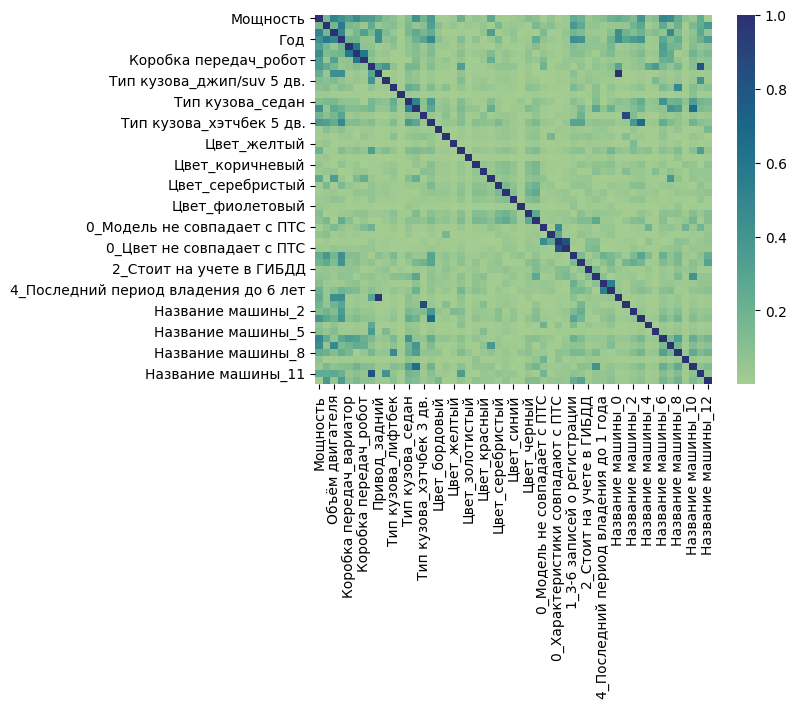

In [16]:
#теперь посмотрим на корреляции переменных
#значения возьмем по модулю, потому что важно само отклонение, а не его знак (ну он тоже важен, но пока возьмем значение)
corr_matrix_abs = df_X.corr().abs()

sns.heatmap(corr_matrix_abs, cmap="crest")

По тепловой матрице видим, что в целом корреляции не везде большие, однако присутствуют отдельные "подозрительные" точки, которые надо отправить в корреляционный патруль и разобраться, что с ними делать.

In [17]:
#выведем 10 самых скоррелированных пар
n_E = 10

corr_matrix = df_X.corr()
mask_E = np.triu(np.ones_like(corr_matrix_abs, dtype=bool), k=1)
corr_values = corr_matrix_abs.where(mask_E)
pairs = corr_values.unstack().sort_values(ascending=False).dropna()
pairs_top_10 = pairs[:10]

print(f"Топ {n_E} пар наиболее скоррелированных признаков:")
for index, pair in enumerate(pairs_top_10.index, start=1):
    col1, col2 = pair
    val = corr_matrix[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Топ 10 пар наиболее скоррелированных признаков:
1. Название машины_0 и Привод_задний: 1.00
2. Название машины_1 и Тип кузова_хэтчбек 3 дв.: 0.86
3. Название машины_11 и Привод_передний: -0.82
4. 0_Цвет не совпадает с ПТС и 0_Характеристики совпадают с ПТС: -0.81
5. Название машины_3 и Тип кузова_хэтчбек 5 дв.: 0.66
6. Название машины_10 и Тип кузова_универсал: 0.66
7. Коробка передач_механика и Коробка передач_вариатор: -0.59
8. Коробка передач_робот и Коробка передач_механика: -0.59
9. Год и Пробег: -0.57
10. 4_Последний период владения до 6 лет и 4_Последний период владения до 1 года: -0.55


In [18]:
#а теперь выведем все пары, у которых корреляция больше 0.5 по модулю:
pairs_thres = pairs[pairs>0.5]

print(f"Пары с корреляцией по модулю >0.5:")
for index, pair in enumerate(pairs_thres.index, start=1):
    col1, col2 = pair
    val = corr_matrix[col1][col2]
    print(f"{index}. {col1} и {col2}: {val:.2f}")

Пары с корреляцией по модулю >0.5:
1. Название машины_0 и Привод_задний: 1.00
2. Название машины_1 и Тип кузова_хэтчбек 3 дв.: 0.86
3. Название машины_11 и Привод_передний: -0.82
4. 0_Цвет не совпадает с ПТС и 0_Характеристики совпадают с ПТС: -0.81
5. Название машины_3 и Тип кузова_хэтчбек 5 дв.: 0.66
6. Название машины_10 и Тип кузова_универсал: 0.66
7. Коробка передач_механика и Коробка передач_вариатор: -0.59
8. Коробка передач_робот и Коробка передач_механика: -0.59
9. Год и Пробег: -0.57
10. 4_Последний период владения до 6 лет и 4_Последний период владения до 1 года: -0.55
11. Тип кузова_универсал и Тип кузова_седан: -0.52
12. Объём двигателя и Мощность: 0.51


Итак, нужно что-то сделать с названиями машин, типами кузовов, приводами и кое-чем еще.

Приступим!

In [19]:
#еще раз выведем все колонки, чтобы понять, какие из них можно агрегировать и выделить общую бинарную переменную:
df_X.columns

Index(['Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Привод_передний', 'Привод_задний',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_лифтбек', 'Тип кузова_минивэн',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Цвет_бордовый', 'Цвет_голубой',
       'Цвет_желтый', 'Цвет_зеленый', 'Цвет_золотистый', 'Цвет_коричневый',
       'Цвет_красный', 'Цвет_оранжевый', 'Цвет_серебристый', 'Цвет_серый',
       'Цвет_синий', 'Цвет_фиолетовый', 'Цвет_черный', 'Цвет_белый',
       '0_Модель не совпадает с ПТС',
       '0_Мощность двигателя не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_3-6 записей о регистрации', '1_более 6 записей о регистрации',
       '2_Стоит на учете в ГИБДД', '3_Не был во владении у юр. лица',
       '4_Последний период владения до 1 года',
       '4_Послед

Еще раз напомним о списке дропнутых дамми, которые здесь, как то самое ружье на стене, выстреливают: ***'0_Год не совпадает с ПТС', '1_1-2 записей о регистрации', '2_Не стоит на учете в ГИБДД', '3_Был во владении у юр. лица', '4_Последний период владения больше 6 лет', 'Коробка передач_АКПП', 'Привод_4WD', 'Тип кузова_джип/suv 3 дв.', 'Цвет_бежевый'.***

**Итак, исходя из логических соображений, можно предположить, что релевантны следующие преобразования:**




1) **Удалить в целом признак "Название машины"**.
Во-первых, данная категория сильно повышает мультиколлинеарность, так как хорошо описывается другими переменными (например, мощностью, коробкой передач, объемом двигателя, приводом и кузовом. Да, кузовы могут быть разными у модели, но все равно варианты ограничены: едва ли мини купер можно купить в комплектации минивэна.
Во-вторых, у данной переменной нет экономическо-исследовательского смысла с точки зрения построения функции гедонистического спроса. У нас присутствует 13 машин, каждая из которых, по факту, есть совокупность упомянутых выше характеристик (концептуально 13 (хотя бы такого порядка) совокупностей). Проще говоря, каждая X_i модель в конкретной комплектации стоит на рынке (отличие первичного от вторичного в данном контексте минимально) Y_i рублей, эта цена известна и стабильна, а значит анализировать влияние названия машины нет смысла (оно и так известно).

2) **В группе коробок передач сделать бинарную переменную "Механика или не механика"**. Предполагается выделение именно механики, потому что она сильнее всего отличается от остальных типов, а они, в свою очередь, довольно похожи друг на друга.

3) **В группе приводов сделать бинарную переменную "Передний или не передний"**. Выделение основывается на том, что передний привод сильнее всего отличается от остальных в представленности в наблюдениях и лучше выделяет класс условно "обычных" машин от "необычных" в данной группе.

4) **В группе кузовов сделать несколько бинарных переменных, которые обозначают "Джип", "Лифтбек", "Минивэн", "Седан" и "Универсал".**
Было решено укрупнить отдельные группы (по дверям) и оставить типы как бинарные переменные. Почему? Потому что одна и та же модель машины может быть представлена в разных кузовах, причем данный признак хоть и является вариативным (можно купить схожую машину, но с другим кузовом), но эта вариативность ограничена (на вторичном рынке подобрать такой же пробег или юридическую историю сложнее), а также признак не может быть изменен как, например, цвет.
То есть основная причина рассмотрения данного признака это существенное различие комплектаций на первичном и вторичном рынках (на вторичном нельзя (очень сложно) купить такую же, но с другим кузовом).

5) **В группе цветов сделать бинарную переменную "Классический цвет или нет"**. К классическим цветам отнесем черный, белый, серый и серебристый. На эти 4 цвета приходится около 70% всех автомобилей в России (см. https://news.drom.ru/79717.html)

6) **В группе юридических аспектов автомобиля (ПТС) сделать бинарную переменную "Есть ли нарушения или нет"**. Тогда любое нарушение и несовпадение будет означать 1, а их полное отсутствие 0.

7) Остальные признаки оставить без изменений, так как они относительно независимы и могут рассматриваться отдельно от подавляющего большинства первичных и вторичных характеристик объявления.

Теперь внесем упомянутые коррективы!


In [43]:
#удаляем название машины:
df_X_new = df_X.iloc[:, :-13]

#делаем бинарную переменную механика или нет:
df_X_new.rename(columns = {'Коробка передач_механика':'Механическая КП'}, inplace = True)
df_X_new.drop(['Коробка передач_вариатор', 'Коробка передач_робот'], axis=1, inplace=True)


df_X_new.head()

,Мощность,Пробег,Объём двигателя,Год,Механическая КП,Привод_передний,Привод_задний,Тип кузова_джип/suv 5 дв.,Тип кузова_лифтбек,Тип кузова_минивэн,...,0_Модель не совпадает с ПТС,0_Мощность двигателя не совпадает с ПТС,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет
0,122.0,86684.0,1.8,2018,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,122.0,77400.0,1.8,2019,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,90.0,9200.0,1.6,2023,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,122.0,84594.0,1.8,2019,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,122.0,58195.0,1.8,2019,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [36]:
dataframe = pd.DataFrame({
    'A': [0, 1, 2],
    'B': [0, 1, 2],
    'C': [0, 1, 2]
})

# Функция для преобразования значения в "0" или "1"
def convert_to_binary(value):
    return "0" if value == 0 else "1"

# Применение функции к каждому столбцу и объединение результатов в один столбец
binary_column = dataframe.apply(convert_to_binary, axis=0)

# Объединение столбцов в один DataFrame
result = pd.concat([dataframe, binary_column], axis=1)

# Переименование нового столбца
result.columns = dataframe.columns.tolist() + ['combined_binary']

# Вывод результата
print(result)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#Разные регрессии

In [20]:
#регрессия только для цветов
colors = df.columns[20:35]

X_color = sm.add_constant(df_enc[colors])
model_color = sm.OLS(df_enc['Цена'], X_color).fit()

print(model_color.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     7.253
Date:                Thu, 09 May 2024   Prob (F-statistic):           7.32e-15
Time:                        20:18:54   Log-Likelihood:                -9119.3
No. Observations:                 641   AIC:                         1.827e+04
Df Residuals:                     625   BIC:                         1.834e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Заметим, что некоторые коэффициенты уже стали положительными, что интуитивно, а p-value перестало везде быть 0, значит оценка цветов уже более содержательная и, что называется, insightful, чем оценка всех параметров

In [21]:
#регрессия только для названий машин
names = df_enc.columns[-13:]

X_name = sm.add_constant(df_enc[names])
model_name = sm.OLS(df_enc['Цена'], X_name).fit()

print(model_name.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     173.0
Date:                Thu, 09 May 2024   Prob (F-statistic):          5.44e-190
Time:                        20:18:55   Log-Likelihood:                -8702.7
No. Observations:                 641   AIC:                         1.743e+04
Df Residuals:                     628   BIC:                         1.749e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.264e+05   1.63

Ситуация тоже стала лучше: коэффициенты тоже бывают положительные, причем большие положительные, а p-value практически везде -> 0, но в данном случае есть логическое объяснение: марка машины напрямую влияет на цену из-за своих характеристик, свойств и репутации.

#Метод главных компонент

In [22]:
sk_PCA = PCA()
sk_X_transformed = sk_PCA.fit_transform(df_enc)

sk_X_transformed[0]

array([ 5.21576135e+05,  4.35332944e+04, -1.19841365e+01,  3.99075976e+00,
       -6.91141860e-01, -1.25134823e-01, -7.79148808e-01,  2.91704258e-01,
        1.63217359e-02, -1.20422003e-01,  4.65540415e-01, -1.68526279e-01,
       -8.20103731e-02, -5.43575695e-01, -7.46843995e-01,  1.90104715e-01,
        3.40402106e-03, -1.88048768e-01, -6.19736699e-02,  3.84992157e-02,
        3.16970503e-01, -6.42911195e-02, -1.35924110e-01, -2.71617863e-01,
       -1.99485786e-01, -3.19207832e-03, -5.07587525e-02,  1.02460233e-01,
        1.91889365e-02, -2.32854933e-01, -3.72706948e-02,  8.63148951e-02,
       -1.08851865e-01,  4.22758121e-03,  2.68059451e-02,  2.05305806e-02,
       -2.48873383e-02,  5.92704489e-02,  2.59113495e-02,  2.93357665e-03,
       -4.18801645e-02,  4.33685666e-02, -1.59339325e-02,  2.44507533e-03,
        6.87680968e-03,  1.86368114e-02,  2.68912516e-02, -5.57138852e-02,
        2.39762296e-03,  2.65919511e-03, -4.36130317e-11,  4.39836257e-10,
        2.14342937e-10, -

In [23]:
# sk_pca = PCA()
# sk_X_transformed = sk_pca.fit_transform(X)

# print('sk transformed data', sk_X_transformed[:10], '', sep='\n')
# print('sk explained_variance', sk_pca.explained_variance_)
# print('sk explained_variance_ratio_', sk_pca.explained_variance_ratio_)


# sk transformed data
# [[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
#  [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
#  [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
#  [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
#  [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]
#  [-2.28085963e+00  7.41330449e-01  1.68677658e-01  2.42008576e-02]
#  [-2.82053775e+00 -8.94613845e-02  2.57892158e-01  4.81431065e-02]
#  [-2.62614497e+00  1.63384960e-01 -2.18793179e-02  4.52978706e-02]
#  [-2.88638273e+00 -5.78311754e-01  2.07595703e-02  2.67447358e-02]
#  [-2.67275580e+00 -1.13774246e-01 -1.97632725e-01  5.62954013e-02]]

# sk explained_variance [4.22824171 0.24267075 0.0782095  0.02383509]
# sk explained_variance_ratio_ [0.92461872 0.05306648 0.01710261 0.00521218]

#Варианты спецификаций

In [24]:
df_enc.columns

Index(['Цена', 'Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Привод_передний', 'Привод_задний',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_лифтбек', 'Тип кузова_минивэн',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Цвет_бордовый', 'Цвет_голубой',
       'Цвет_желтый', 'Цвет_зеленый', 'Цвет_золотистый', 'Цвет_коричневый',
       'Цвет_красный', 'Цвет_оранжевый', 'Цвет_серебристый', 'Цвет_серый',
       'Цвет_синий', 'Цвет_фиолетовый', 'Цвет_черный', 'Цвет_белый',
       '0_Модель не совпадает с ПТС',
       '0_Мощность двигателя не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_3-6 записей о регистрации', '1_более 6 записей о регистрации',
       '2_Стоит на учете в ГИБДД', '3_Не был во владении у юр. лица',
       '4_Последний период владения до 1 года',
       '

In [25]:
warnings.filterwarnings("ignore")

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_color.values, i) for i in range(X_color.shape[1])]
vif["features"] = X_color.columns

vif = vif.round(1)
vif

,VIF,features
0,677.5,const
1,1.8,Цвет_зеленый
2,1.0,Цвет_золотистый
3,2.2,Цвет_коричневый
4,2.0,Цвет_красный
5,1.5,Цвет_оранжевый
6,2.7,Цвет_серебристый
7,3.4,Цвет_серый
8,2.1,Цвет_синий
9,1.0,Цвет_фиолетовый


(array([  2.,   2.,   1.,   0.,   4.,  20.,  76.,  69., 221., 246.]),
 array([1978. , 1982.6, 1987.2, 1991.8, 1996.4, 2001. , 2005.6, 2010.2,
        2014.8, 2019.4, 2024. ]),
 <BarContainer object of 10 artists>)

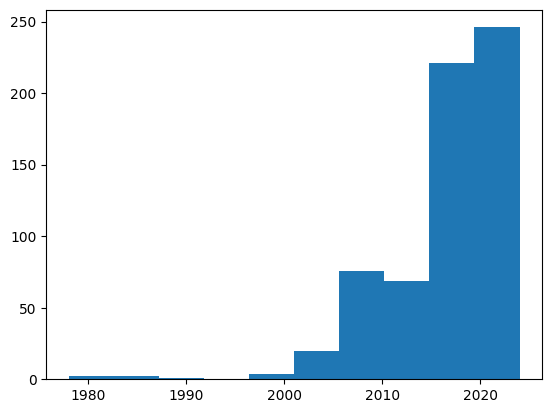

In [26]:
plt.hist(df['Год'])

In [27]:
# #да, вполне, потому что количество машин всего около 640, а "классов" всего 13, посмотрим на гистограмму распределения
# plt.hist(df[''])
# plt.xticks(rotation=90)
# plt.show()
# #для большей части названий наблюдений достаточно, однако для 5 наименований маловато, позже решим, что с этим делать

In [28]:
df_no_link

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_передний,Привод_задний,...,0_Мощность двигателя не совпадает с ПТС,0_Характеристики совпадают с ПТС,0_Цвет не совпадает с ПТС,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Стоит на учете в ГИБДД,3_Не был во владении у юр. лица,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Название машины
0,1350000,122.0,86684.0,1.8,2018,0,1,0,1,0,...,0,1,0,0,0,1,1,0,1,Лада Веста Кросс
1,1350000,122.0,77400.0,1.8,2019,0,0,1,1,0,...,0,1,0,0,0,1,1,0,1,Лада Веста
2,950000,90.0,9200.0,1.6,2023,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,Лада Гранта
3,1165000,122.0,84594.0,1.8,2019,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Лада Веста Кросс
4,1145000,122.0,58195.0,1.8,2019,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,Лада Веста
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1215000,106.0,14214.0,1.6,2023,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,Лада Веста
637,445000,98.0,94000.0,1.6,2010,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,Лада Приора
638,1370000,106.0,93010.0,1.6,2021,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,Лада Ларгус
639,360000,98.0,237000.0,1.6,2009,0,1,0,1,0,...,0,1,0,0,1,1,1,0,0,Лада Приора


In [29]:
#теперь у нас есть огромная таблица с кучей признаков. попробуем прогнать регрессию, чтобы прикинуть на глаз, есть ли мультиколлинеарность или все и так хорошо
df_y_0 = df_no_link['Цена']
df_X_0 = df_no_link.drop(['Цена', 'Название машины'], axis=1)

X_0 = sm.add_constant(df_X_0)
model_0 = sm.OLS(df_y_0, X_0).fit()

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 09 May 2024   Prob (F-statistic):          2.26e-247
Time:                        20:18:56   Log-Likelihood:                -8494.7
No. Observations:                 641   AIC:                         1.707e+04
Df Residuals:                     601   BIC:                         1.725e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [30]:
#проверим предположение о мультиколлинеарности, посчитав VIF-ы
#ниже мы увидим, что VIF -> inf, а значит будет присутствовать деление на ноль, чтобы избежать предупреждений поставим заглушку
warnings.filterwarnings("ignore")

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_X_0.values, i) for i in range(df_X_0.shape[1])]
vif["features"] = df_X_0.columns

vif = vif.round(1)
vif

,VIF,features
0,202.6,Мощность
1,4.7,Пробег
2,1834.7,Объём двигателя
3,2390.2,Год
4,3.3,Коробка передач_вариатор
5,24.7,Коробка передач_механика
6,3.2,Коробка передач_робот
7,inf,Привод_передний
8,inf,Привод_задний
9,1.3,Тип кузова_джип/suv 5 дв.


In [31]:
vif = vif.round(1)
vif

,VIF,features
0,202.6,Мощность
1,4.7,Пробег
2,1834.7,Объём двигателя
3,2390.2,Год
4,3.3,Коробка передач_вариатор
5,24.7,Коробка передач_механика
6,3.2,Коробка передач_робот
7,inf,Привод_передний
8,inf,Привод_задний
9,1.3,Тип кузова_джип/suv 5 дв.


In [32]:
vif[vif['VIF']>5]

,VIF,features
0,202.6,Мощность
2,1834.7,Объём двигателя
3,2390.2,Год
5,24.7,Коробка передач_механика
7,inf,Привод_передний
8,inf,Привод_задний
10,inf,Тип кузова_лифтбек
11,inf,Тип кузова_минивэн
12,inf,Тип кузова_седан
13,inf,Тип кузова_универсал


In [33]:
import seaborn as sns

# calculate the correlation matrix on the numeric columns
corr = df_X_0.corr()

# plot the heatmap
sns.heatmap(corr, cmap=)

SyntaxError: invalid syntax (<ipython-input-33-73aaf3157f88>, line 7)

In [ ]:
import seaborn as sns

# calculate the correlation matrix on the numeric columns
corr = df_X_0.corr()

# plot the heatmap
sns.heatmap(corr, cmap=)



# Получаем корреляционную матрицу
corr_matrix = df_X_0.corr().abs()

# Маска для верхнего треугольника корреляционной матрицы без диагональных элементов
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Выбираем элементы с маской
corr_values = corr_matrix.where(mask)

# Находим пары столбцов с наибольшей корреляцией
pairs = corr_values.unstack().sort_values(ascending=False).dropna()

# Выводим первые n пар
n = 10
print(f"Топ {n} пар наиболее скоррелированных столбцов:")
for i, (index, value) in enumerate(pairs.items(), start=1):
    if i > n:
        break
    col1, col2 = index
    print(f"{i}. {col1} и {col2}: {value:.2f}")

In [ ]:
df_X_0.corr()

In [ ]:
# df['Тип кузова_универсал'].sum()/len(df)
df['Тип кузова_седан'].sum()/len(df)
# df['Тип кузова_минивэн'].sum()/len(df)

In [ ]:
df['Объём двигателя'].var()

In [ ]:
plt.hist(np.log(df['Пробег']), 50)
plt.show()

In [ ]:
plt.hist(df['Пробег'], 50)
plt.show()

In [ ]:
np.log(100)